In [26]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as ppl
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix
%matplotlib inline

Параметры для выбора -

n_estimators: от 10 до 50 с шагом 10

max_depth: от 1 до 12 с шагом 2

min_samples_leaf: от 1 до 7

min_samples_split: от 2 до 9 с шагом 2

Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.


In [3]:
data = pd.read_csv('training_mush.csv')

In [12]:
X_train, y_train = data.iloc[:, :-1], data.iloc[:, -1]

In [13]:
params = {
'n_estimators':range(10,51,10),
'max_depth':range(1,13,2),
'min_samples_leaf':range(1,8),
'min_samples_split':range(2,10,2)   
}
clf_forest = RandomForestClassifier(random_state=0)
search = GridSearchCV(clf_forest, params, verbose=1, cv=3, n_jobs=-1)
search.fit(X_train, y_train)

Fitting 3 folds for each of 840 candidates, totalling 2520 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)},
             verbose=1)

In [14]:
search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [16]:
best_tree = search.best_estimator_
pd.DataFrame({'feature': list(X_train), 'importance': best_tree.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [17]:
test_values = pd.read_csv('testing_mush.csv')

In [19]:
prediction = best_tree.predict(test_values)

In [23]:
prediction.sum()

976

In [24]:
y_test_real = pd.read_csv('testing_y_mush.csv')

<Axes: >

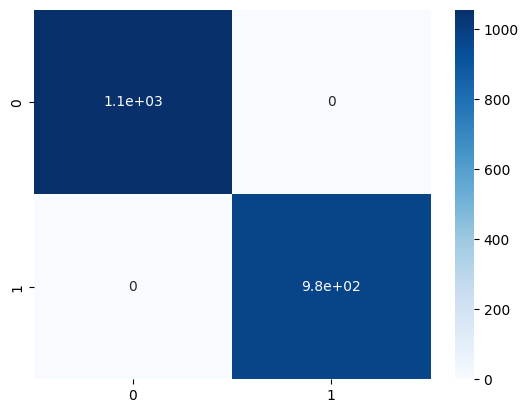

In [29]:
sns.heatmap(confusion_matrix(prediction, y_test_real), annot=True, cmap="Blues")